# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [117]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [118]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [119]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [120]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, balanced_accuracy_score, precision_score, f1_score, recall_score, confusion_matrix
from sklearn.linear_model import LinearRegression

In [122]:
# Creating a training 
X = data.iloc[: , :13]
y = data['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [123]:
# Create the Linear Regression estimator
lm = LinearRegression()

# Perform the fitting
lm.fit(X_train, y_train)

LinearRegression()

In [124]:
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

## 3. Calculate and print R-squared for both the training and the testing set.

In [125]:
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

0.7330718157133299
0.7660417339818686


## 4. Calculate and print mean squared error for both the training and the testing set.

In [126]:
print(mean_squared_error(y_train_pred, y_train))
print(mean_squared_error(y_test_pred, y_test))

22.983560528722496
18.060568005370456


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [127]:
print(mean_absolute_error(y_train_pred, y_train))
print(mean_absolute_error(y_test_pred, y_test))

3.358081752439966
3.095950046268854


## Classification Model Evaluation

In [128]:
from sklearn.datasets import load_iris
data = load_iris()

In [129]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [130]:
column_names = data.feature_names

In [131]:
df = pd.DataFrame(data['data'],columns=column_names)

In [132]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [135]:
target = pd.DataFrame(data.target)

In [144]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [152]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [137]:
X = df
y = target

In [138]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(8,8))
pd.options.plotting.backend = "plotly"
sns.set(rc={'figure.figsize':(6,6)});

<Figure size 800x800 with 0 Axes>

In [153]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [154]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
lm.fit(X_train, y_train)

LogisticRegression()

In [155]:
y_pred = lm.predict(X_train)

In [156]:
y_pred_test = lm.predict(X_test)

## 8. Calculate and print the accuracy score for both the training and the testing set.

    This function resolves the 8,9,10,11,12 & 13 exercices.

In [179]:
# Printing the full report
from sklearn.metrics import classification_report
print("Training Report: ")
print(classification_report(y_train ,y_pred))
print()
print("Testing Report: ")
print(classification_report(y_test ,y_pred_test))

Training Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      0.95      0.98        42
           2       0.95      1.00      0.97        39

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120


Testing Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.88      0.88      0.88         8
           2       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [164]:
# Printing only the accuracy
from sklearn.metrics import accuracy_score

print("Training Accuracy:", accuracy_score(y_train ,y_pred))
print("Testing Accuracy:", accuracy_score(y_test ,y_pred_test))

Training Accuracy: 0.9833333333333333
Testing Accuracy: 0.9333333333333333


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [165]:
from sklearn.metrics import balanced_accuracy_score

print("Training Balanced Accuracy:", balanced_accuracy_score(y_train ,y_pred))
print("Testing Balanced Accuracy:", balanced_accuracy_score(y_test ,y_pred_test))

Training Balanced Accuracy: 0.9841269841269842
Testing Balanced Accuracy: 0.9280303030303031


## 10. Calculate and print the precision score for both the training and the testing set.

In [177]:
print("Precision Score Training:", precision_score(y_train , y_pred, average='macro'))
print("Precision Score Testing:", precision_score(y_test , y_pred_test, average='macro'))

Precision Score Training: 0.983739837398374
Precision Score Testing: 0.9280303030303031


## 11. Calculate and print the recall score for both the training and the testing set.

In [181]:
print("Recall Score Training:", recall_score(y_train , y_pred, average='macro'))
print("Recall Score Testing:", recall_score(y_test , y_pred_test, average='macro'))

Recall Score Training: 0.9841269841269842
Recall Score Testing: 0.9280303030303031


## 12. Calculate and print the F1 score for both the training and the testing set.

In [184]:
print("F1 Score Training:", f1_score(y_train , y_pred, average='macro'))
print("F1 Score Testing:", f1_score(y_test , y_pred_test, average='macro'))

F1 Score Training: 0.9835365853658536
F1 Score Testing: 0.9280303030303031


## 13. Generate confusion matrices for both the training and the testing set.

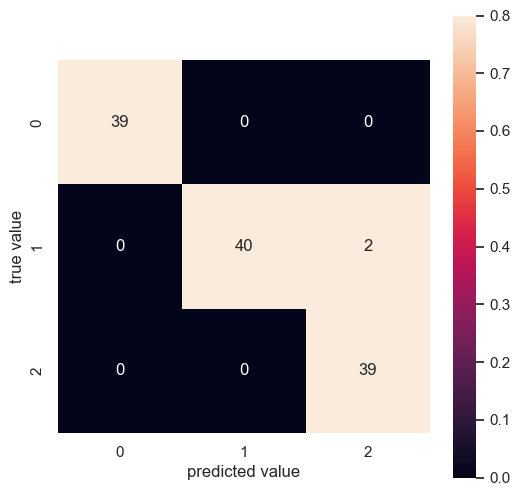

In [194]:
confusion_matrix(y_train , y_pred)
sns.heatmap(confusion_matrix(y_train , y_pred), vmax=.8, square=True, annot=True)
plt.ylabel('true value')
plt.xlabel('predicted value')
print()

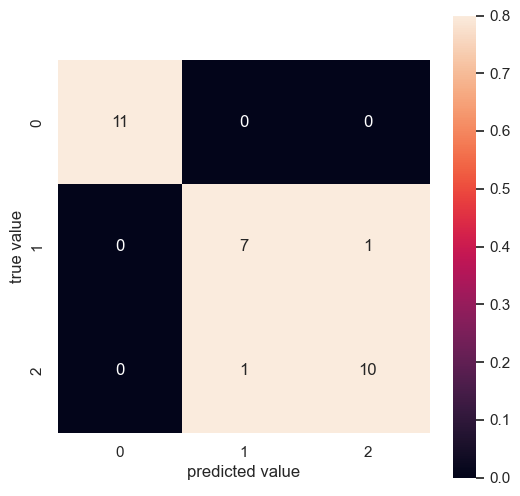

In [195]:
sns.heatmap(confusion_matrix(y_test , y_pred_test), vmax=.8, square=True, annot=True)
plt.ylabel('true value')
plt.xlabel('predicted value')
print()

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.